# **word n grame**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Load your data into a DataFrame
df = pd.read_excel('/content/drive/MyDrive/Copy of val.xlsx')

# Ensure your label column is named 'class' and the tweet text is under 'Tweet'
labels = df[' class'].values  # Make sure there's no leading space in column name 'class'
tweets = df['Tweet'].values

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X_tfidf = tfidf_vectorizer.fit_transform(tweets)

# Define parameter grid for Grid Search specific to Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],     # Penalties
    'solver': ['liblinear', 'saga']  # Algorithms to use in the optimization problem
}

# Initialize Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')

# Perform Grid Search
grid_search.fit(X_tfidf, labels)

# Print best parameters found by Grid Search
print(f"Best parameters: {grid_search.best_params_}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


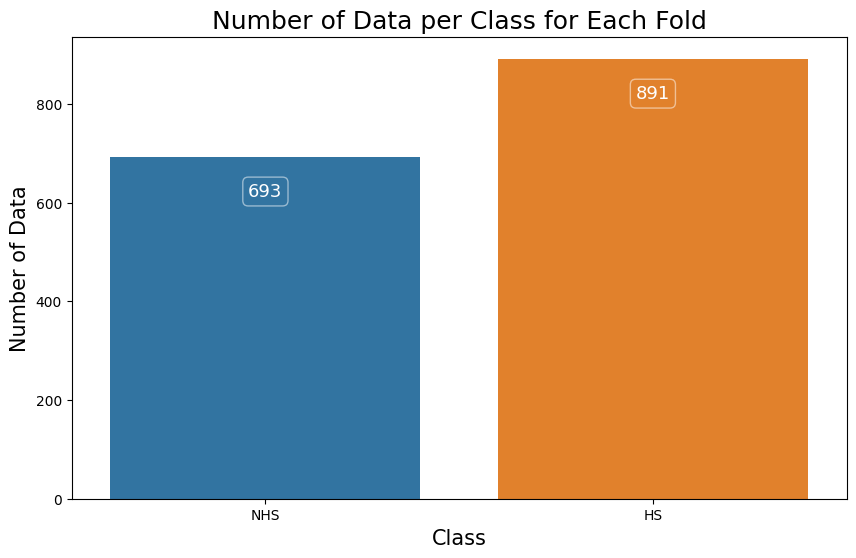

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold

# Load your data into a DataFrame
df = pd.read_excel('/content/drive/MyDrive/seema/Copy of val.xlsx')


labels = df['class'].values  # Make sure to correct the space in column name if necessary
tweets = df['Tweet'].values

# Initialize lists to store class counts for each fold
fold_class_counts = []

# Stratified K-Fold setup
skf = StratifiedKFold(n_splits=5)

# Loop through the folds
for fold, (train_idx, val_idx) in enumerate(skf.split(tweets, labels)):
    # print(f'\nFold {fold + 1}')

    # Get the labels for the validation set of this fold
    y_val_fold = labels[val_idx]

    # Count occurrences of each class in the validation set of this fold
    unique_classes, class_counts = np.unique(y_val_fold, return_counts=True)
    fold_class_counts.append(class_counts)

# Convert fold_class_counts to a DataFrame for easier plotting
fold_class_counts_df = pd.DataFrame(fold_class_counts, columns=np.unique(labels))
fold_class_counts_df.columns= ['NHS', 'HS']
# Plotting
categories = ['NHS', 'HS'] # Assuming 'labels' contains your class labels

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

# Using seaborn barplot to show the number of data in each class for each fold
sns.barplot(data=fold_class_counts_df, ax=ax)

# Annotate each bar with custom category names and counts
for a, p in enumerate(ax.patches):
    category_index = a % len(categories)  # Get the index of the category for this bar
    category_name = categories[category_index]

    # Format annotation to include category name and count
    annotation_text = f'{int(p.get_height())}'

    ax.annotate(annotation_text,
                xy=(p.get_x() + p.get_width() / 2.0, p.get_height()),
                xytext=(0, -25),
                size=13,
                color='white',
                ha='center',
                va='center',
                textcoords='offset points',
                bbox=dict(boxstyle='round', facecolor='none', edgecolor='white', alpha=0.5))

# Set labels and title
plt.xlabel('Class', size=15)
plt.ylabel('Number of Data', size=15)
plt.title('Number of Data per Class for Each Fold', size=18)

# Show plot
plt.show()



Fold 1
Accuracy: 0.7451104100946372
Precision: 0.7429006220725507
Recall: 0.7352335009285682
F1 Score: 0.7374347215661575
Confusion Matrix:
[[455 238]
 [166 726]]


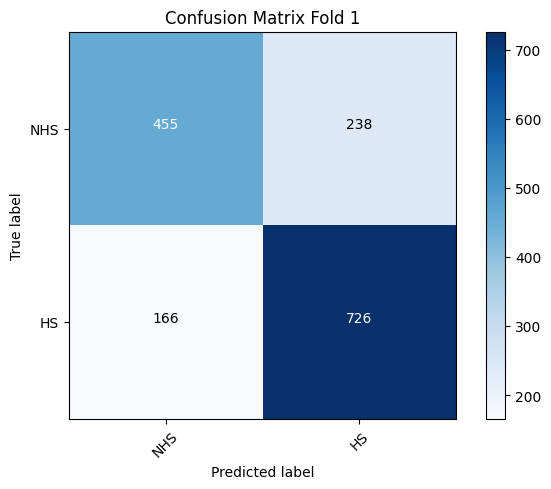


Fold 2
Accuracy: 0.7526813880126183
Precision: 0.753824255434243
Recall: 0.7398674444638571
F1 Score: 0.7429102958360505
Confusion Matrix:
[[442 251]
 [141 751]]


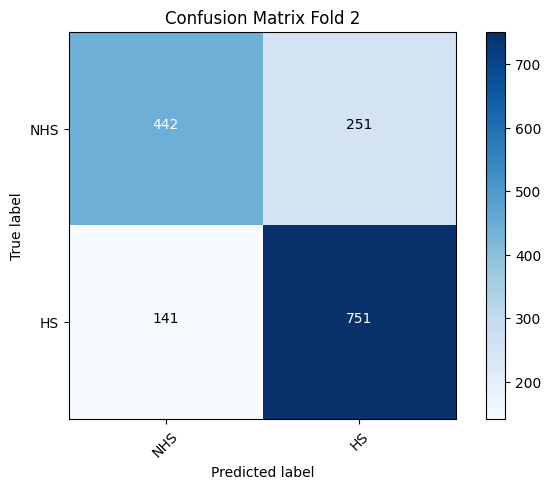


Fold 3
Accuracy: 0.7665615141955836
Precision: 0.7650832950635279
Recall: 0.7576420626372595
F1 Score: 0.7599522892639383
Confusion Matrix:
[[476 218]
 [152 739]]


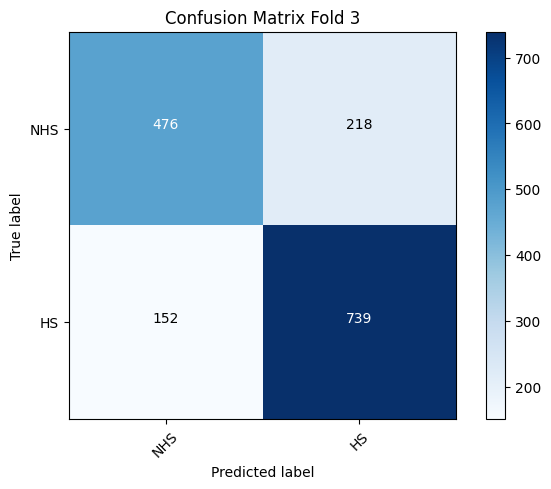


Fold 4
Accuracy: 0.7361111111111112
Precision: 0.7373284735990027
Recall: 0.721981721981722
F1 Score: 0.7247361322905563
Confusion Matrix:
[[422 271]
 [147 744]]


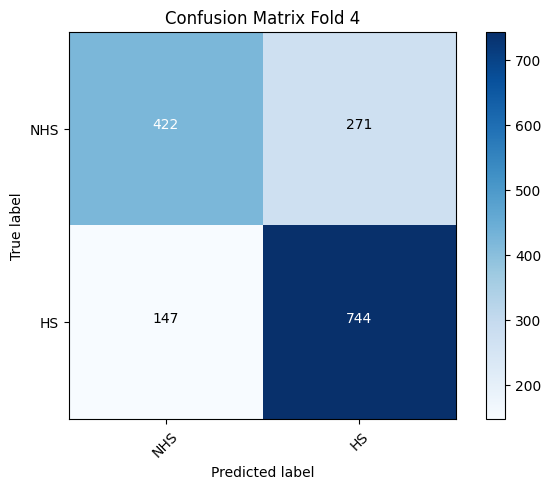


Fold 5
Accuracy: 0.7449494949494949
Precision: 0.7417475535605383
Recall: 0.7368927368927369
F1 Score: 0.7385403864759563
Confusion Matrix:
[[466 227]
 [177 714]]


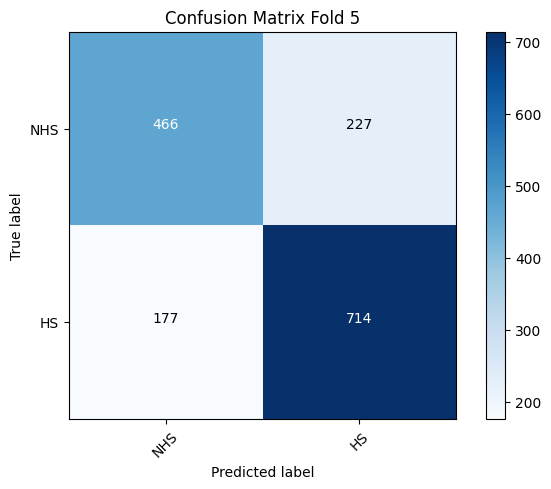


Mean Metrics Across All Folds:
Mean Accuracy: 0.749082783672689
Mean Precision: 0.7481768399459725
Mean Recall: 0.7383234933808287
Mean F1 Score: 0.7407147650865318

Aggregated Confusion Matrix:
[[2261 1205]
 [ 783 3674]]


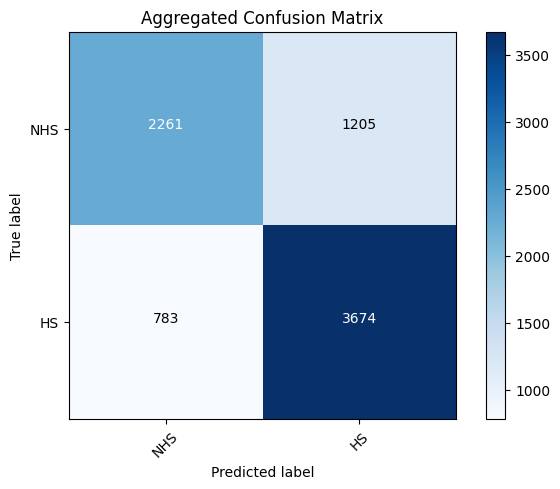

In [ ]:
-import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import itertools

# Define the function to compute metrics
def compute_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='macro')
    return accuracy, precision, recall, f1

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Load your data into a DataFrame
df = pd.read_excel('/content/drive/MyDrive/seema/Copy of val.xlsx')


labels = df['class'].values  # Make sure to correct the space in column name if necessary
tweets = df['Tweet'].values

# Stratified K-Fold setup
skf = StratifiedKFold(n_splits=5)

# Initialize lists to store metrics for each fold
fold_accuracies = []
fold_precisions = []
fold_recalls = []
fold_f1_scores = []
aggregate_cm = np.array([[0, 0], [0, 0]])

# Vectorize the text data
tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X_tfidf = tfidf_vectorizer.fit_transform(tweets)

# Loop through the folds
for fold, (train_idx, val_idx) in enumerate(skf.split(X_tfidf, labels)):
    print(f'\nFold {fold + 1}')

    # Split the data
    X_train_tfidf, X_val_tfidf = X_tfidf[train_idx], X_tfidf[val_idx]
    y_train, y_val = labels[train_idx], labels[val_idx]

    # Initialize and train the Logistic Regression model
    lr_model = LogisticRegression(C=1, penalty='l2', solver='liblinear')
    lr_model.fit(X_train_tfidf, y_train)

    # Predict on the validation set
    y_pred = lr_model.predict(X_val_tfidf)

    # Compute metrics
    accuracy, precision, recall, f1 = compute_metrics(y_val, y_pred)
    fold_accuracies.append(accuracy)
    fold_precisions.append(precision)
    fold_recalls.append(recall)
    fold_f1_scores.append(f1)

    # Output metrics
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')

    # Compute and output confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    aggregate_cm += cm
    print(f'Confusion Matrix:\n{cm}')
    plot_confusion_matrix(cm, classes=['NHS', 'HS'], title=f'Confusion Matrix Fold {fold + 1}')

# Calculate and print mean of the metrics across all folds
mean_accuracy = np.mean(fold_accuracies)
mean_precision = np.mean(fold_precisions)
mean_recall = np.mean(fold_recalls)
mean_f1_score = np.mean(fold_f1_scores)

print('\nMean Metrics Across All Folds:')
print(f'Mean Accuracy: {mean_accuracy}')
print(f'Mean Precision: {mean_precision}')
print(f'Mean Recall: {mean_recall}')
print(f'Mean F1 Score: {mean_f1_score}')

# Plot the aggregated confusion matrix
print('\nAggregated Confusion Matrix:')
print(aggregate_cm)
plot_confusion_matrix(aggregate_cm, classes=['NHS', 'HS'], title='Aggregated Confusion Matrix')


# **char ngrame **


Fold 1
Accuracy: 0.7873817034700316
Precision: 0.7858878968253968
Recall: 0.7797109467513055
F1 Score: 0.7818677587197562
Confusion Matrix:
[[498 195]
 [142 750]]


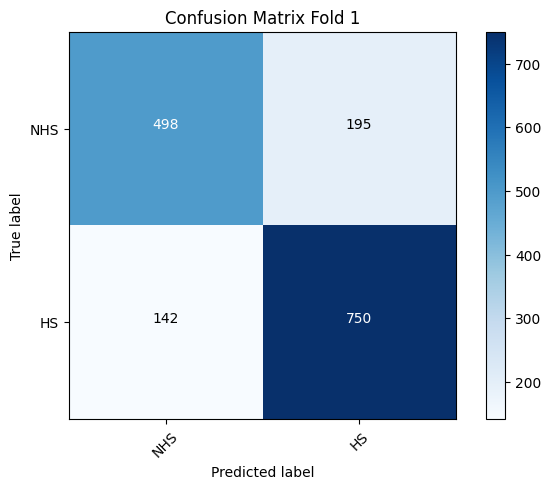


Fold 2
Accuracy: 0.7735015772870663
Precision: 0.771474041005291
Recall: 0.7656085195322864
F1 Score: 0.7676276717519064
Confusion Matrix:
[[487 206]
 [153 739]]


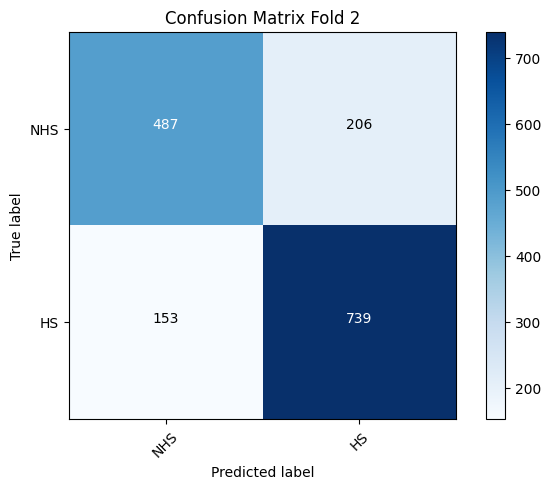


Fold 3
Accuracy: 0.7659305993690851
Precision: 0.7646166666666667
Recall: 0.7567623076748917
F1 Score: 0.7591470544987464
Confusion Matrix:
[[474 220]
 [151 740]]


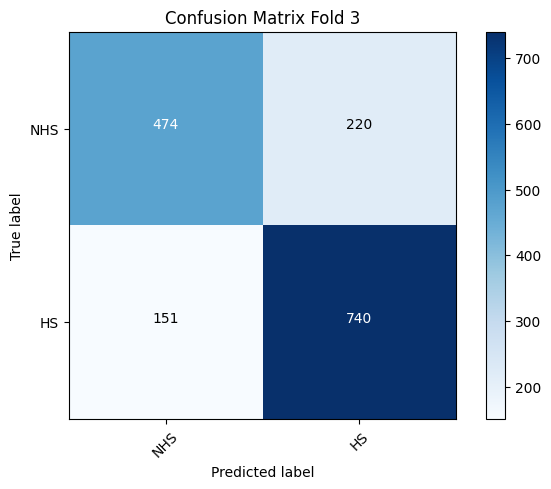


Fold 4
Accuracy: 0.7544191919191919
Precision: 0.7558336934378664
Recall: 0.7416225749559083
F1 Score: 0.7447040178987601
Confusion Matrix:
[[443 250]
 [139 752]]


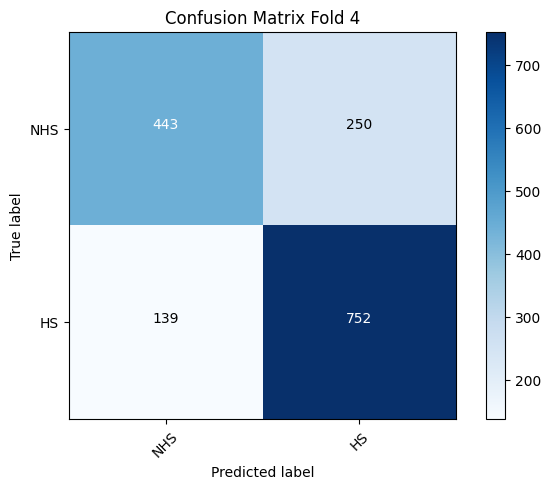


Fold 5
Accuracy: 0.7619949494949495
Precision: 0.7595603813559322
Recall: 0.753968253968254
F1 Score: 0.7558648517715261
Confusion Matrix:
[[478 215]
 [162 729]]


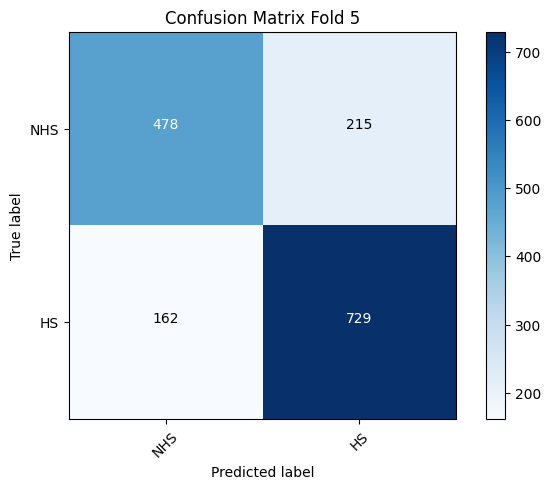


Mean Metrics Across All Folds:
Mean Accuracy: 0.768645604308065
Mean Precision: 0.7674745358582307
Mean Recall: 0.7595345205765291
Mean F1 Score: 0.7618422709281389

Aggregated Confusion Matrix:
[[2380 1086]
 [ 747 3710]]


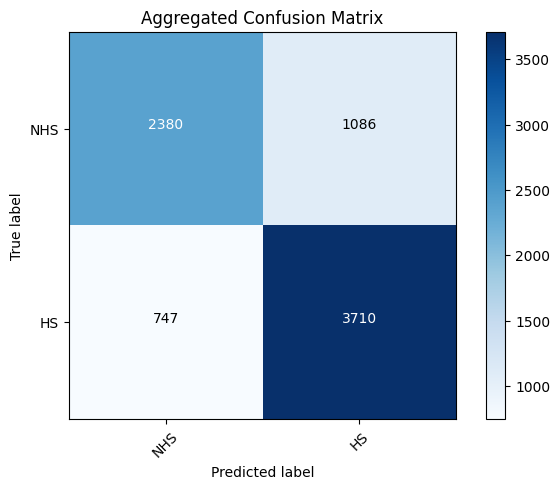

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import itertools

# Define the function to compute metrics
def compute_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='macro')
    return accuracy, precision, recall, f1

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Load your data into a DataFrame
df = pd.read_excel('/content/drive/MyDrive/seema/Copy of val.xlsx')

# Ensure your label column is named 'class' and the tweet text is under 'Tweet'
labels = df['class'].values  # Make sure to correct the space in column name if necessary
tweets = df['Tweet'].values

# Stratified K-Fold setup
skf = StratifiedKFold(n_splits=5)

# Initialize lists to store metrics for each fold
fold_accuracies = []
fold_precisions = []
fold_recalls = []
fold_f1_scores = []
aggregate_cm = np.array([[0, 0], [0, 0]])

# Vectorize the text data using Character N-grams
tfidf_vectorizer = TfidfVectorizer(analyzer='char', max_features=10000, ngram_range=(2, 6))
X_tfidf = tfidf_vectorizer.fit_transform(tweets)


# Loop through the folds
for fold, (train_idx, val_idx) in enumerate(skf.split(X_tfidf, labels)):
    print(f'\nFold {fold + 1}')

    # Split the data
    X_train_tfidf, X_val_tfidf = X_tfidf[train_idx], X_tfidf[val_idx]
    y_train, y_val = labels[train_idx], labels[val_idx]

    # Initialize and train the Logistic Regression model
    lr_model = LogisticRegression(C=1, penalty='l2', solver='liblinear')
    lr_model.fit(X_train_tfidf, y_train)

    # Predict on the validation set
    y_pred = lr_model.predict(X_val_tfidf)

    # Compute metrics
    accuracy, precision, recall, f1 = compute_metrics(y_val, y_pred)
    fold_accuracies.append(accuracy)
    fold_precisions.append(precision)
    fold_recalls.append(recall)
    fold_f1_scores.append(f1)

    # Output metrics
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')

    # Compute and output confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    aggregate_cm += cm
    print(f'Confusion Matrix:\n{cm}')
    plot_confusion_matrix(cm, classes=['NHS', 'HS'], title=f'Confusion Matrix Fold {fold + 1}')

# Calculate and print mean of the metrics across all folds
mean_accuracy = np.mean(fold_accuracies)
mean_precision = np.mean(fold_precisions)
mean_recall = np.mean(fold_recalls)
mean_f1_score = np.mean(fold_f1_scores)

print('\nMean Metrics Across All Folds:')
print(f'Mean Accuracy: {mean_accuracy}')
print(f'Mean Precision: {mean_precision}')
print(f'Mean Recall: {mean_recall}')
print(f'Mean F1 Score: {mean_f1_score}')

# Plot the aggregated confusion matrix
print('\nAggregated Confusion Matrix:')
print(aggregate_cm)
plot_confusion_matrix(aggregate_cm, classes=['NHS', 'HS'], title='Aggregated Confusion Matrix')


**word/char n grame**


Fold 1
Accuracy: 0.7974763406940063
Precision: 0.7947455406039743
Recall: 0.7925426591345874
F1 Score: 0.7934979148275547
Confusion Matrix:
[[522 171]
 [150 742]]


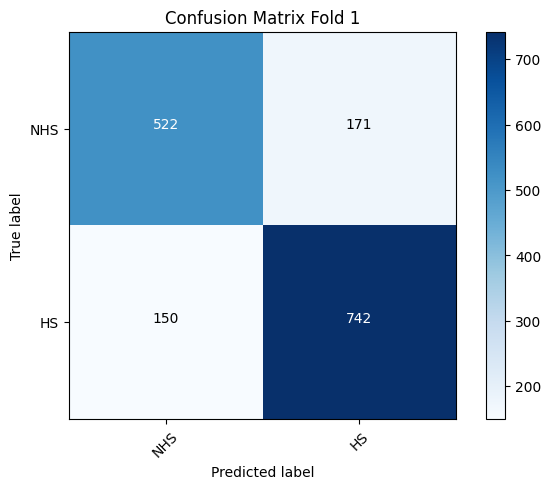


Fold 2
Accuracy: 0.7810725552050474
Precision: 0.7785228346766783
Recall: 0.7745884534001126
F1 Score: 0.7761088918551338
Confusion Matrix:
[[501 192]
 [155 737]]


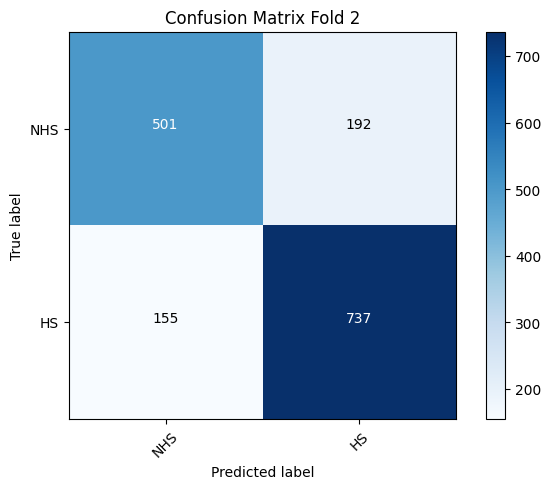


Fold 3
Accuracy: 0.7766561514195583
Precision: 0.7740013377794828
Recall: 0.7702844972297422
F1 Score: 0.771723104263089
Confusion Matrix:
[[499 195]
 [159 732]]


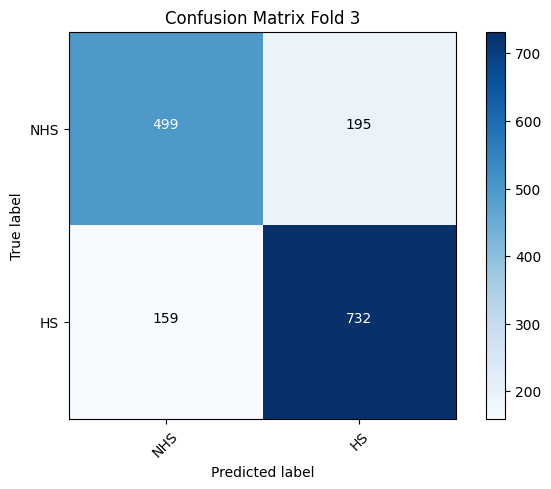


Fold 4
Accuracy: 0.7695707070707071
Precision: 0.7697716090627468
Recall: 0.7589385922719256
F1 Score: 0.761861513424946
Confusion Matrix:
[[467 226]
 [139 752]]


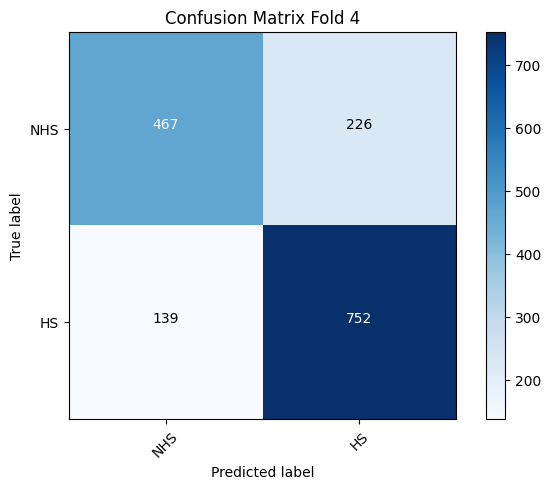


Fold 5
Accuracy: 0.7657828282828283
Precision: 0.7622194221414758
Recall: 0.7608625941959275
F1 Score: 0.7614696996818184
Confusion Matrix:
[[500 193]
 [178 713]]


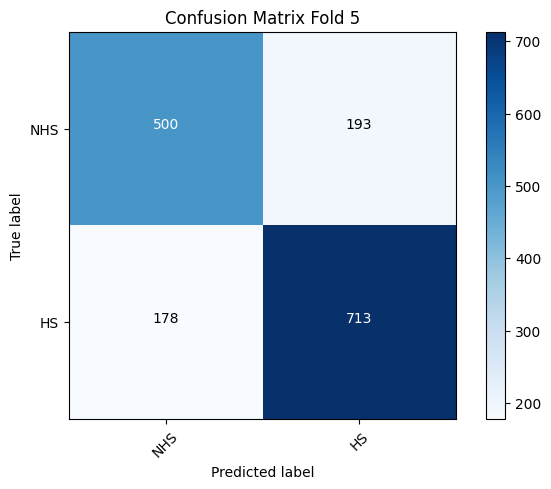


Mean Metrics Across All Folds:
Mean Accuracy: 0.7781117165344295
Mean Precision: 0.7758521488528716
Mean Recall: 0.7714433592464591
Mean F1 Score: 0.7729322248105083

Aggregated Confusion Matrix:
[[2489  977]
 [ 781 3676]]


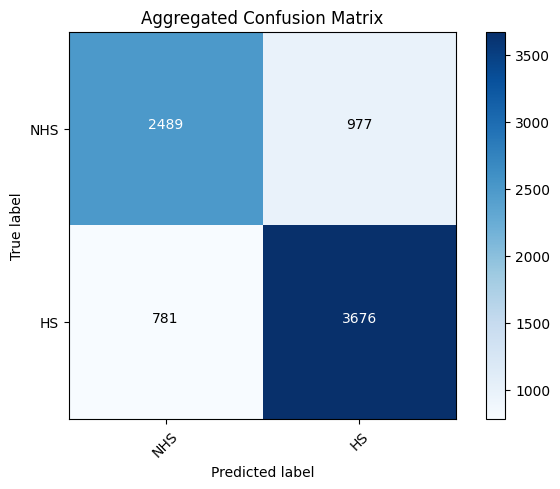

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import itertools
from scipy.sparse import hstack

# Define the function to compute metrics
def compute_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='macro')
    return accuracy, precision, recall, f1

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Load your data into a DataFrame
df = pd.read_excel('/content/drive/MyDrive/seema/Copy of val.xlsx')

# Ensure your label column is named 'class' and the tweet text is under 'Tweet'
labels = df['class'].values  # Corrected column name space
tweets = df['Tweet'].values

# Initialize TfidfVectorizer for Word N-grams and Character N-grams
word_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
char_vectorizer = TfidfVectorizer(analyzer='char', max_features=5000, ngram_range=(2, 6))

# Fit and transform the tweets using both vectorizers
X_word = word_vectorizer.fit_transform(tweets)
X_char = char_vectorizer.fit_transform(tweets)

# Combine the Word and Character N-grams features
X_combined = hstack([X_word, X_char])

# Stratified K-Fold setup
skf = StratifiedKFold(n_splits=5)

# Initialize lists to store metrics for each fold
fold_accuracies = []
fold_precisions = []
fold_recalls = []
fold_f1_scores = []
aggregate_cm = np.array([[0, 0], [0, 0]])

# Loop through the folds
for fold, (train_idx, val_idx) in enumerate(skf.split(X_combined, labels)):
    print(f'\nFold {fold + 1}')

    # Split the combined features for training and validation
    X_train, X_val = X_combined[train_idx], X_combined[val_idx]
    y_train, y_val = labels[train_idx], labels[val_idx]

    # Initialize and train the Logistic Regression model
    lr_model = LogisticRegression(C=1, penalty='l2', solver='liblinear')
    lr_model.fit(X_train, y_train)

    # Predict on the validation set
    y_pred = lr_model.predict(X_val)

    # Compute metrics
    accuracy, precision, recall, f1 = compute_metrics(y_val, y_pred)
    fold_accuracies.append(accuracy)
    fold_precisions.append(precision)
    fold_recalls.append(recall)
    fold_f1_scores.append(f1)

    # Output metrics
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')

    # Compute and output confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    aggregate_cm += cm
    print(f'Confusion Matrix:\n{cm}')
    plot_confusion_matrix(cm, classes=['NHS', 'HS'], title=f'Confusion Matrix Fold {fold + 1}')

# Calculate and print mean of the metrics across all folds
mean_accuracy = np.mean(fold_accuracies)
mean_precision = np.mean(fold_precisions)
mean_recall = np.mean(fold_recalls)
mean_f1_score = np.mean(fold_f1_scores)

print('\nMean Metrics Across All Folds:')
print(f'Mean Accuracy: {mean_accuracy}')
print(f'Mean Precision: {mean_precision}')
print(f'Mean Recall: {mean_recall}')
print(f'Mean F1 Score: {mean_f1_score}')

# Plot the aggregated confusion matrix
print('\nAggregated Confusion Matrix:')
print(aggregate_cm)
plot_confusion_matrix(aggregate_cm, classes=['NHS', 'HS'], title='Aggregated Confusion Matrix')
